In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Is American Dream an Illusion?
"Pull yourself by the bootstrap!" American dream promises wealth and success for those determined enough to work hard. That may have been true in the past, but is it true anymore? Let's try to answer that question.

In [2]:
df= pd.read_csv('/Users/josephlim/Desktop/Data Science/Crafting a Story from a Dataset/adult.csv')

In [3]:
df.shape

(48842, 15)

In [4]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


Let's replace income category into numbers, so we could better visualize relationship with other features.

In [5]:
income_dict={'<=50K':0,'>50K':1}
df= df.replace(income_dict)

In [6]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 5.6+ MB


In [8]:
df.nunique()

age                   74
workclass              9
fnlwgt             28523
education             16
educational-num       16
marital-status         7
occupation            15
relationship           6
race                   5
gender                 2
capital-gain         123
capital-loss          99
hours-per-week        96
native-country        42
income                 2
dtype: int64

There are seven marital status. Let's explore that.

In [9]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,0


In [10]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [11]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382,0.239282
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444,0.426649
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


We see that the average age of working American is around 39 years old. For those who experience capital gains, the average capital gain is \\$7452.02. For those who experience capital loss, the average capital lossi is $403.00. Average Americans work around 40-hour work week. Mean doesn't accurately present population is distributed. Let's see how the population is distributed across different features.

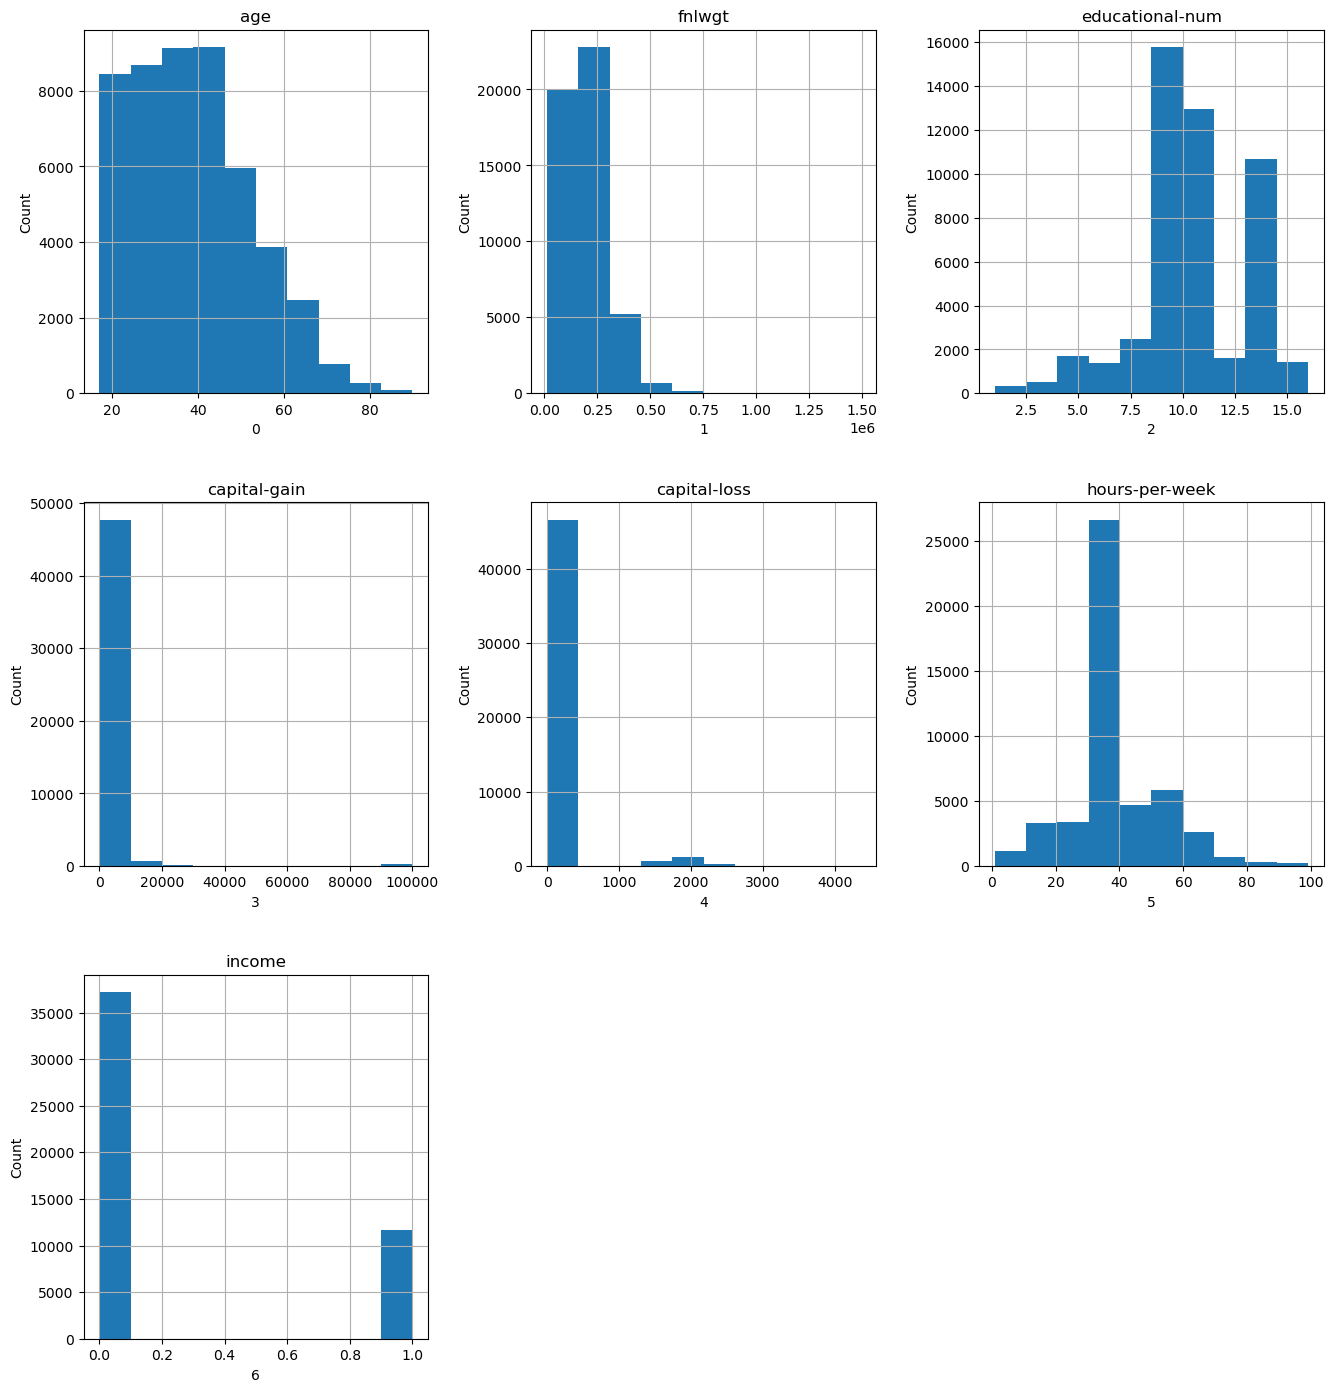

In [12]:
hist= df.hist(bins=10, figsize=(16,17))
for i,ax in enumerate(hist.ravel()):
    ax.set_xlabel(f'{i}')
    ax.set_ylabel('Count')
    
plt.show()

We see that the majority of population is younger than 40 years old. Fnlwgt stands for final weight, which seeks to allocate similar weight to people with similar demographic characters. The most common education level is some college. We also see that the majority of population experienced financial gain. In fact, less than 10,000 people experienced any financial gain. However, it also seems that majority did not experience financial loss either. Majority of population work 40-hour work week. Most people earn less than or equal to \\$50,000 per year. Though we often associate education with social mobility and financial stability with age, we suspect there may not be any clear association. 

Let's see if there are correlations between these features.

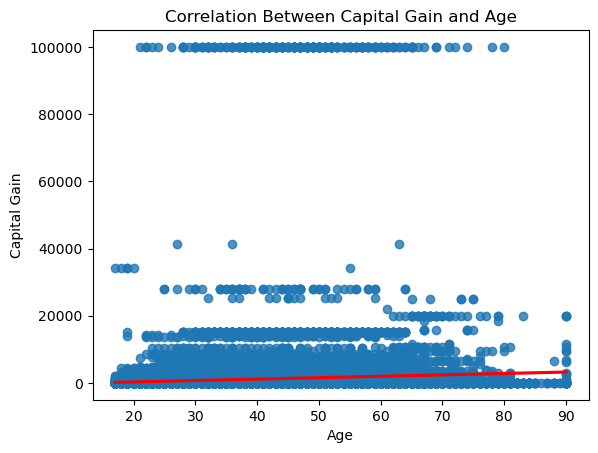

In [13]:
fig, ax= plt.subplots()
sns.regplot(x=df['age'], y=df['capital-gain'], ci=None, line_kws={"color": "red"})


plt.xlabel('Age')
plt.ylabel('Capital Gain')
plt.title('Correlation Between Capital Gain and Age')
plt.show()

There is close to no correlation between age and capital gain. One may assert that it may be from the fact that those less educated have less knowledge about savings. Let's test that hypothesis.

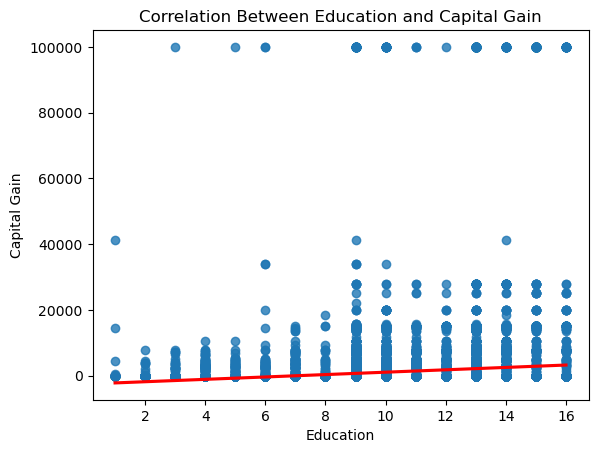

In [14]:
fig, ax= plt.subplots()
sns.regplot(x=df['educational-num'], y=df['capital-gain'],ci=None,line_kws={"color": "red"})


plt.xlabel('Education')
plt.ylabel('Capital Gain')
plt.title('Correlation Between Education and Capital Gain')
plt.show()

There is also close to no correlation between education and capital gain. This is not due to the amount of knowledge or education level. Perhaps those with higher income would save more. 

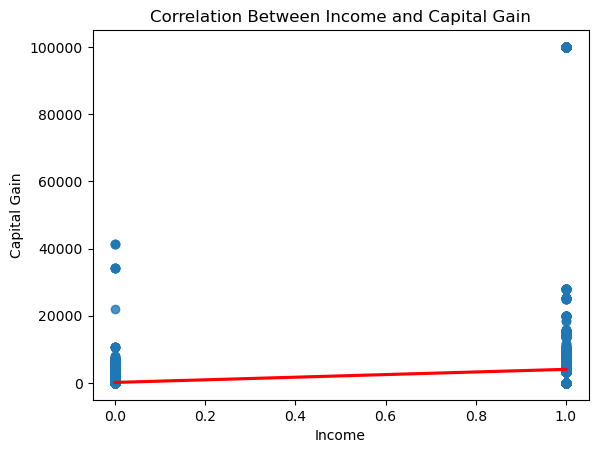

In [15]:
fig, ax= plt.subplots()
sns.regplot(x=df['income'], y=df['capital-gain'],ci=None,line_kws={"color": "red"})


plt.xlabel('Income')
plt.ylabel('Capital Gain')
plt.title('Correlation Between Income and Capital Gain')
plt.show()

1 stands for those with income greater than \\$50,000 dollars and 0 for those with income less than or equal to \\$50,000. Again, there is close to no correlation.

Lastly, let's try to answer the question that we've been asking. Does hard work lead to wealth and success?

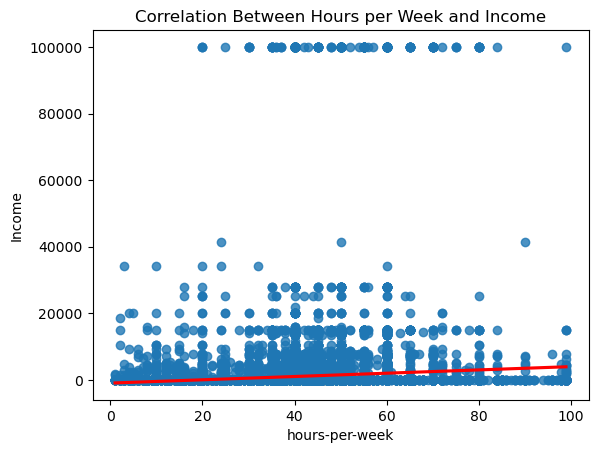

In [16]:
fig, ax= plt.subplots()
sns.regplot(x=df['hours-per-week'], y=df['capital-gain'],ci=None,line_kws={"color": "red"})


plt.xlabel('hours-per-week')
plt.ylabel('Income')
plt.title('Correlation Between Hours per Week and Income')
plt.show()

There is little to no correlation between hours-per-week worked and income. While this alone may not be enough to debunk American Dream, it should also stand behind those who work hard but struggle to taste American Dream.

## Take-away:
Although average Americans work 40+ hours per week, the majority of them is not able to increase their wealth. While we may be quick to dismiss those who struggle financially lazy, it is also evident that the struggle for not only financial success, but also a mere stability is real, despite the age, income, and educational level. Of course, one of the more perfect solutions would be to enforce everyone to tie their belt and save. However, that simply isn't realistic and would violate our personal rights. Instead, perhaps it is a time that we evaluate and reflect our system, and look for room for improvements.

<br> This topic can be further investigated by having multiple years of data. Introducing temporality into this dataset would not only allow us to see more clear trend throughout the time, but also observe social mobility, which is what American Dream ultimately promises.